In [1]:
import pandas as pd

df = pd.read_csv('FIFA_CSV/Gesamt.csv', header=3)

In [2]:
df.rename(columns={'Shots per\ngame':'Shots per game'}, inplace=True)

# Date Exploration - EDA

In [3]:
df.head()

,Name,Name.1,Rating,Fifa Ability Overall,Position,Apps,Minutes played,Assists,Yel,Red,...,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Key passes per game,Passes per game,Pass success percentage,Crosses,Long balls per game,Through balls per game
0,manipulation,NaN,string,string,string,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,manipulation,NaN,string,string,string,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lionel Messi,"Lionel Messi Barcelona, 32, AM(CR),FW",8.48,94,"AM(CR), FW",29,2710,13,3,0,...,1.9,0.5,2.3,1.9,2.7,53.8,81.3,0.4,3.4,0.9
3,Cristiano Ronaldo,"Cristiano Ronaldo Juventus, 34, M(L),FW",7.68,94,"M(L), FW",30,2689,8,3,0,...,1.6,0.9,1.3,1.7,1.5,33.3,85.1,0.5,1.0,0.0
4,Neymar,"Neymar Paris Saint-Germain, 27, AM(CLR),FW",8.26,92,"AM(CLR), FW",16,1444,7,2,0,...,3.4,0.4,4.2,4.1,2.5,57.8,81.1,1.0,2.5,0.9


In [4]:
df = df.drop(labels=[0,1])

In [5]:
df.head()

,Name,Name.1,Rating,Fifa Ability Overall,Position,Apps,Minutes played,Assists,Yel,Red,...,Fouled per game,Offsides per game,Dispossessed per game,Bad control per game,Key passes per game,Passes per game,Pass success percentage,Crosses,Long balls per game,Through balls per game
2,Lionel Messi,"Lionel Messi Barcelona, 32, AM(CR),FW",8.48,94,"AM(CR), FW",29,2710,13,3,0,...,1.9,0.5,2.3,1.9,2.7,53.8,81.3,0.4,3.4,0.9
3,Cristiano Ronaldo,"Cristiano Ronaldo Juventus, 34, M(L),FW",7.68,94,"M(L), FW",30,2689,8,3,0,...,1.6,0.9,1.3,1.7,1.5,33.3,85.1,0.5,1.0,0.0
4,Neymar,"Neymar Paris Saint-Germain, 27, AM(CLR),FW",8.26,92,"AM(CLR), FW",16,1444,7,2,0,...,3.4,0.4,4.2,4.1,2.5,57.8,81.1,1.0,2.5,0.9
5,Luis Suárez,"Luis Suárez Barcelona, 32, AM(CLR),FW",7.57,91,"AM(CLR), FW",31,2830,6,5,0,...,1.7,0.8,1.6,2.3,1.4,29.0,75.3,0.2,1.5,0.1
6,Luka Modric,"Luka Modric Real Madrid, 33, M(C)",7.03,91,M(C),31,2618,6,6,0,...,1.4,0.1,1.2,1.1,1.6,55.6,88.9,0.6,4.1,0.1


# Data Preparation

(1) Get rid of duplicates

In [6]:
len(df)

2137

In [7]:
duplicates = df.duplicated(subset=['Name'], keep=False)

duplicates.value_counts()[True]

duplicate_rows = df.loc[duplicates]
duplicate_rows

df = df.drop(index=df[duplicates].index)

In [8]:
len(df)

1956

In [93]:
df.columns

Index(['Name', 'Name.1', 'Rating', 'Fifa Ability Overall', 'Position', 'Apps',
       'Minutes played', 'Assists', 'Yel', 'Red', 'Aerials Won per game',
       'Man of the match', 'Tackles', 'Interceptions per game', 'Fouls',
       'Offside won per game', 'Clearances per game', 'Dribbled past per game',
       'Outfielder Block Per Game', 'OwnG', 'Goals', 'Shots per game',
       'Dribbles per game', 'Fouled per game', 'Offsides per game',
       'Dispossessed per game', 'Bad control per game', 'Key passes per game',
       'Passes per game', 'Pass success percentage', 'Crosses',
       'Long balls per game', 'Through balls per game', 'pos'],
      dtype='object')

(2) Find out unique values for player position

In [9]:
pos = df['Position'].unique()

pos

array(['AM(CR), FW', 'M(L), FW', 'AM(CLR), FW', 'M(C)', 'D(CR)', 'FW',
       'M(CLR), FW', 'D(C)', 'M(CLR)', 'DMC', 'AM(LR), FW', 'AM(CL), FW',
       'AM(C), FW', 'AM(CLR)', 'Forward, Forward', 'D(C), D(C)',
       'M(LR), FW', 'D(L)', 'D(CL)', 'AM(R), FW', 'M(C), FW', 'DMC, DMC',
       'D(R), DMC', 'D(CLR), M(R)', 'D(L), M(L)', 'M(R)', 'D(CR), DMC',
       'D(CL), M(C)', 'D(CL), M(CLR)', 'AM(C), AM(C)', 'M(CL)', 'D(R)',
       'D(CR), M(R)', 'M(CL), FW', 'M(LR)', 'D(R), M(CLR), FW',
       'AM(L), FW', 'M(CR)', 'D(R), M(CR)', 'D(C), M(C)', 'AM(L)',
       'D(R), M(C)', 'AM(CLR), AM(CLR)', 'D(CL), M(L)', 'D(C), DMC',
       'D(L), M(CLR)', 'D(L), M(CL)', 'D(R), M(R)', 'D(LR), M(R)',
       'D(R), M(CLR)', 'M(CR), FW', 'D(CR), M(C)', 'D(LR), M(CLR)',
       'D(L), DMC, M(L)', 'AM(CL)', 'D(LR)', 'AM(C)', 'M(C), M(C)',
       'M(R), FW', 'AM(R)', 'D(CLR), DMC', 'DMC, M(L)', 'D(CLR)',
       'D(LR), M(CR)', 'D(LR), M(LR)', 'D(CL), DMC', 'D(CLR), M(L)',
       'AM(LR)', 'Forward', 'D(CR)

(3) Add a new column 'pos' with only three values: DEF, MID, OFF

In [10]:
def positions(pos: str):
    if 'M' in pos and 'F' in pos:
        return 'OFF'
    
    elif 'M' in pos and 'D' in pos:
        return 'DEF'
        
    elif 'M' in pos:
        return 'MID'

    elif 'F' in pos:
        return 'OFF'
    
    elif 'D' in pos:
        return 'DEF'



df['pos'] = df['Position'].apply(positions)



In [11]:
df.head()

,Name,Name.1,Rating,Fifa Ability Overall,Position,Apps,Minutes played,Assists,Yel,Red,...,Offsides per game,Dispossessed per game,Bad control per game,Key passes per game,Passes per game,Pass success percentage,Crosses,Long balls per game,Through balls per game,pos
2,Lionel Messi,"Lionel Messi Barcelona, 32, AM(CR),FW",8.48,94,"AM(CR), FW",29,2710,13,3,0,...,0.5,2.3,1.9,2.7,53.8,81.3,0.4,3.4,0.9,OFF
3,Cristiano Ronaldo,"Cristiano Ronaldo Juventus, 34, M(L),FW",7.68,94,"M(L), FW",30,2689,8,3,0,...,0.9,1.3,1.7,1.5,33.3,85.1,0.5,1.0,0.0,OFF
4,Neymar,"Neymar Paris Saint-Germain, 27, AM(CLR),FW",8.26,92,"AM(CLR), FW",16,1444,7,2,0,...,0.4,4.2,4.1,2.5,57.8,81.1,1.0,2.5,0.9,OFF
5,Luis Suárez,"Luis Suárez Barcelona, 32, AM(CLR),FW",7.57,91,"AM(CLR), FW",31,2830,6,5,0,...,0.8,1.6,2.3,1.4,29.0,75.3,0.2,1.5,0.1,OFF
6,Luka Modric,"Luka Modric Real Madrid, 33, M(C)",7.03,91,M(C),31,2618,6,6,0,...,0.1,1.2,1.1,1.6,55.6,88.9,0.6,4.1,0.1,MID


In [12]:
df.to_csv('new_Gesamt.csv', index=False, encoding='utf-8')

In [13]:
df.columns

Index(['Name', 'Name.1', 'Rating', 'Fifa Ability Overall', 'Position', 'Apps',
       'Minutes played', 'Assists', 'Yel', 'Red', 'Aerials Won per game',
       'Man of the match', 'Tackles', 'Interceptions per game', 'Fouls',
       'Offside won per game', 'Clearances per game', 'Dribbled past per game',
       'Outfielder Block Per Game', 'OwnG', 'Goals', 'Shots per game',
       'Dribbles per game', 'Fouled per game', 'Offsides per game',
       'Dispossessed per game', 'Bad control per game', 'Key passes per game',
       'Passes per game', 'Pass success percentage', 'Crosses',
       'Long balls per game', 'Through balls per game', 'pos'],
      dtype='object')

(4) Specify relevant attributes for each position

In [14]:
def_att_pos = ['Apps', 'Minutes played', 'Assists', 'Aerials Won per game', 'Man of the match', 'Tackles', 'Interceptions per game', 'Offside won per game', 'Clearances per game', 'Long balls per game']

def_att_neg = ['Fouls', 'Dribbled past per game', 'Bad control per game']

def_att = ['Name', 'Rating'] + def_att_pos + def_att_neg

mid_att_pos = ['Apps', 'Minutes played', 'Assists', 'Aerials Won per game', 'Man of the match', 'Tackles', 'Interceptions per game', 'Dribbles per game', 'Fouled per game', 'Key passes per game', 'Pass success percentage', 'Crosses', 'Long balls per game', 'Through balls per game']

mid_att_neg = ['Fouls', 'Dribbled past per game', 'Dispossessed per game', 'Bad control per game']

mid_att = ['Name', 'Rating'] + mid_att_pos + mid_att_neg

off_att_pos = ['Apps', 'Minutes played', 'Assists', 'Aerials Won per game', 'Man of the match', 'Goals', 'Shots per game', 'Dribbles per game', 'Key passes per game', 'Pass success percentage', 'Crosses', 'Through balls per game']

off_att_neg = ['Offsides per game', 'Dispossessed per game', 'Bad control per game']

off_att = ['Name', 'Rating'] + off_att_pos + off_att_neg

In [15]:
off_att

['Name',
 'Rating',
 'Apps',
 'Minutes played',
 'Assists',
 'Aerials Won per game',
 'Man of the match',
 'Goals',
 'Shots per game',
 'Dribbles per game',
 'Key passes per game',
 'Pass success percentage',
 'Crosses',
 'Through balls per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game']

In [94]:
def_att

['Name',
 'Rating',
 'Apps',
 'Minutes played',
 'Assists',
 'Aerials Won per game',
 'Man of the match',
 'Tackles',
 'Interceptions per game',
 'Offside won per game',
 'Clearances per game',
 'Long balls per game',
 'Fouls',
 'Dribbled past per game',
 'Bad control per game']

In [95]:
mid_att

['Name',
 'Rating',
 'Apps',
 'Minutes played',
 'Assists',
 'Aerials Won per game',
 'Man of the match',
 'Tackles',
 'Interceptions per game',
 'Dribbles per game',
 'Fouled per game',
 'Key passes per game',
 'Pass success percentage',
 'Crosses',
 'Long balls per game',
 'Through balls per game',
 'Fouls',
 'Dribbled past per game',
 'Dispossessed per game',
 'Bad control per game']

In [16]:
df.columns

Index(['Name', 'Name.1', 'Rating', 'Fifa Ability Overall', 'Position', 'Apps',
       'Minutes played', 'Assists', 'Yel', 'Red', 'Aerials Won per game',
       'Man of the match', 'Tackles', 'Interceptions per game', 'Fouls',
       'Offside won per game', 'Clearances per game', 'Dribbled past per game',
       'Outfielder Block Per Game', 'OwnG', 'Goals', 'Shots per game',
       'Dribbles per game', 'Fouled per game', 'Offsides per game',
       'Dispossessed per game', 'Bad control per game', 'Key passes per game',
       'Passes per game', 'Pass success percentage', 'Crosses',
       'Long balls per game', 'Through balls per game', 'pos'],
      dtype='object')

In [17]:
len(df.columns)

34

(5) Divide the dataframe into three separate dataframes for each position

In [18]:
# create deep-copies

df_def = df[df['pos'] == 'DEF'].copy()
df_mid = df[df['pos'] == 'MID'].copy()
df_off = df[df['pos'] == 'OFF'].copy()

# df_def.loc[:, 'Rating'] = df_def['Rating'].values.astype(float).copy()
# df_mid.loc[:, 'Rating'] = df_mid['Rating'].values.astype(float).copy()
# df_off.loc[:, 'Rating'] = df_off['Rating'].values.astype(float).copy()

In [19]:
df['pos'].isnull().any()

False

In [20]:
len(df_def)

974

In [21]:
len(df_mid)

521

In [22]:
len(df_off)

461

(6) Change the data type of the dependent variable (Rating) to numeric

In [23]:
# df_def.loc[:, 'Rating'] = df_def['Rating'].astype(float)
# df_mid.loc[:, 'Rating'] = df_mid['Rating'].astype(float)
# df_off[:, 'Rating'] = df_off['Rating'].astype(float)

df_def['Rating'] = pd.to_numeric(df_def['Rating'], errors='coerce')
df_mid['Rating'] = pd.to_numeric(df_mid['Rating'], errors='coerce')
df_off['Rating'] = pd.to_numeric(df_off['Rating'], errors='coerce')

In [24]:
df_def['Rating'].dtype

dtype('float64')

(7) Keep only the relevant columns for each position

In [25]:
def drop_col(df: pd.DataFrame, col_list):
    return df.drop(columns=df.columns.difference(col_list, sort=False))

In [26]:
df_def = drop_col(df_def, def_att)
df_mid = drop_col(df_mid, mid_att)
df_off = drop_col(df_off, off_att)

In [27]:
df_def

,Name,Rating,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Tackles,Interceptions per game,Fouls,Offside won per game,Clearances per game,Dribbled past per game,Bad control per game,Long balls per game
7,Sergio Ramos,6.91,28,2476,1,2.2,2,1.5,1.3,1.0,1.0,3.0,0.6,0.4,7.1
13,Diego Godín,6.98,28,2508,1,3.0,1,1.7,1.5,1.1,0.2,4.5,0.7,0.4,3.1
16,Sergio Busquets,7.00,30,2720,1,1.5,0,2.6,1.5,1.1,0.0,0.6,1.4,0.4,4.3
20,NGolo Kanté,6.93,36,3096,4,0.8,1,2.1,1.2,1.0,0.0,0.7,1.2,1.6,1.0
22,Giorgio Chiellini,6.98,22,1990,1,2.1,0,1.0,1.2,0.6,0.2,3.7,0.1,0.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,Yoel Armougom,6.36,20,1850,1,0.9,0,1.1,0.7,0.7,0.1,2.0,0.5,1.0,1.4
2134,Ben Wilmot,6.07,2,198,0,0.2,0,0.0,0.4,0.4,0.2,2.2,0.4,0.8,1.2
2135,Keven Schlotterbeck,6.58,8,772,0,1.4,0,2.4,1.4,0.6,0.4,2.8,0.4,0.4,3.1
2136,Nico Schlotterbeck,6.47,2,226,0,1.3,0,1.5,1.3,1.0,0.0,2.5,0.0,0.0,2.8


In [28]:
df_mid

,Name,Rating,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Tackles,Interceptions per game,Fouls,Dribbled past per game,Dribbles per game,Fouled per game,Dispossessed per game,Bad control per game,Key passes per game,Pass success percentage,Crosses,Long balls per game,Through balls per game
6,Luka Modric,7.03,31,2618,6,0.4,1,1.4,0.9,0.8,1.0,1.6,1.4,1.2,1.1,1.6,88.9,0.6,4.1,0.1
12,Toni Kroos,7.09,26,2227,4,0.8,2,1.8,0.5,0.8,1.5,0.5,2.0,0.4,0.6,2.3,93.2,1.5,7.8,0.1
14,David Silva,7.26,28,2412,8,0.6,1,0.9,0.7,0.8,0.6,0.9,0.8,0.9,0.8,2.2,87.8,0.5,1.2,0.2
23,James Rodríguez,7.24,13,1143,3,0.2,3,0.6,0.2,0.4,0.7,0.8,0.8,0.6,0.7,2.6,87.1,1.6,2.4,0.2
26,Philippe Coutinho,6.93,22,2023,2,0.2,0,0.5,0.4,0.6,0.4,1.5,1.3,1.4,1.2,0.9,87.9,0.2,1.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,Christoph Baumgartner,5.97,1,86,0,0.5,0,0.5,0.0,1.0,1.0,2.5,1.5,0.5,1.5,0.0,62.9,0.0,0.0,0.0
2128,Callum Slattery,6.26,1,110,0,1.0,0,1.3,0.7,1.3,1.3,0.3,1.0,0.7,1.3,0.0,71.0,0.0,0.3,0.0
2130,Stephane Omeonga,5.95,0,54,0,0.7,0,0.3,0.0,1.3,0.3,0.0,0.3,0.7,0.0,0.7,76.9,0.0,0.0,0.0
2133,Matty Daly,5.96,0,73,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,58.3,0.0,0.0,0.0


In [29]:
df_off

,Name,Rating,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Goals,Shots per game,Dribbles per game,Offsides per game,Dispossessed per game,Bad control per game,Key passes per game,Pass success percentage,Crosses,Through balls per game
2,Lionel Messi,8.48,29,2710,13,0.2,17,36,5.0,3.9,0.5,2.3,1.9,2.7,81.3,0.4,0.9
3,Cristiano Ronaldo,7.68,30,2689,8,1.1,10,21,5.7,1.5,0.9,1.3,1.7,1.5,85.1,0.5,0.0
4,Neymar,8.26,16,1444,7,0.5,7,15,3.2,4.4,0.4,4.2,4.1,2.5,81.1,1.0,0.9
5,Luis Suárez,7.57,31,2830,6,0.7,5,21,3.4,1.1,0.8,1.6,2.3,1.4,75.3,0.2,0.1
8,Leo Suárez,6.25,7,520,0,0.3,0,2,0.8,0.3,0.3,0.6,1.4,0.2,80.4,0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Jonathan Burkardt,6.46,4,262,0,1.0,0,0,1.5,0.5,0.0,2.8,1.8,1.3,61.4,0.5,0.0
2110,Robert Beric,6.74,12,1172,1,1.3,1,9,1.6,0.2,0.2,0.7,1.4,0.3,68.9,0.0,0.0
2113,Boulaye Dia,6.56,8,746,0,1.1,0,3,1.1,0.9,0.1,0.8,1.6,0.4,68.4,0.0,0.0
2121,Dusan Vlahovic,5.96,1,152,0,0.2,0,0,1.0,0.1,0.0,0.5,1.1,0.3,62.2,0.1,0.0


In [30]:
# df_def = df_def.loc[:, def_att]
# df_mid = df_mid.loc[:, mid_att]
# df_off = df_off.loc[:, off_att]

# df_def = df_def.set_index("Name")
# df_mid = df_mid.set_index("Name")
# df_off = df_off.set_index("Name")

In [31]:
df_def.head()

,Name,Rating,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Tackles,Interceptions per game,Fouls,Offside won per game,Clearances per game,Dribbled past per game,Bad control per game,Long balls per game
7,Sergio Ramos,6.91,28,2476,1,2.2,2,1.5,1.3,1.0,1.0,3.0,0.6,0.4,7.1
13,Diego Godín,6.98,28,2508,1,3.0,1,1.7,1.5,1.1,0.2,4.5,0.7,0.4,3.1
16,Sergio Busquets,7.00,30,2720,1,1.5,0,2.6,1.5,1.1,0.0,0.6,1.4,0.4,4.3
20,NGolo Kanté,6.93,36,3096,4,0.8,1,2.1,1.2,1.0,0.0,0.7,1.2,1.6,1.0
22,Giorgio Chiellini,6.98,22,1990,1,2.1,0,1.0,1.2,0.6,0.2,3.7,0.1,0.4,4.4


In [32]:
df_off.head()

,Name,Rating,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Goals,Shots per game,Dribbles per game,Offsides per game,Dispossessed per game,Bad control per game,Key passes per game,Pass success percentage,Crosses,Through balls per game
2,Lionel Messi,8.48,29,2710,13,0.2,17,36,5.0,3.9,0.5,2.3,1.9,2.7,81.3,0.4,0.9
3,Cristiano Ronaldo,7.68,30,2689,8,1.1,10,21,5.7,1.5,0.9,1.3,1.7,1.5,85.1,0.5,0.0
4,Neymar,8.26,16,1444,7,0.5,7,15,3.2,4.4,0.4,4.2,4.1,2.5,81.1,1.0,0.9
5,Luis Suárez,7.57,31,2830,6,0.7,5,21,3.4,1.1,0.8,1.6,2.3,1.4,75.3,0.2,0.1
8,Leo Suárez,6.25,7,520,0,0.3,0,2,0.8,0.3,0.3,0.6,1.4,0.2,80.4,0.0,0.1


In [33]:
df_mid.head()

,Name,Rating,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Tackles,Interceptions per game,Fouls,Dribbled past per game,Dribbles per game,Fouled per game,Dispossessed per game,Bad control per game,Key passes per game,Pass success percentage,Crosses,Long balls per game,Through balls per game
6,Luka Modric,7.03,31,2618,6,0.4,1,1.4,0.9,0.8,1.0,1.6,1.4,1.2,1.1,1.6,88.9,0.6,4.1,0.1
12,Toni Kroos,7.09,26,2227,4,0.8,2,1.8,0.5,0.8,1.5,0.5,2.0,0.4,0.6,2.3,93.2,1.5,7.8,0.1
14,David Silva,7.26,28,2412,8,0.6,1,0.9,0.7,0.8,0.6,0.9,0.8,0.9,0.8,2.2,87.8,0.5,1.2,0.2
23,James Rodríguez,7.24,13,1143,3,0.2,3,0.6,0.2,0.4,0.7,0.8,0.8,0.6,0.7,2.6,87.1,1.6,2.4,0.2
26,Philippe Coutinho,6.93,22,2023,2,0.2,0,0.5,0.4,0.6,0.4,1.5,1.3,1.4,1.2,0.9,87.9,0.2,1.2,0.1


(8) Set index for the dataframes

In [34]:
df_def = df_def.set_index('Name')
df_mid = df_mid.set_index('Name')
df_off = df_off.set_index('Name')

(7) Specify dependent and independent variables

In [35]:
Y_def = df_def['Rating']
X_def = df_def.drop('Rating', axis=1)

Y_mid = df_mid['Rating']
X_mid = df_mid.drop('Rating', axis=1)

Y_off = df_off['Rating']
X_off = df_off.drop('Rating', axis=1)


In [36]:
X_def

,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Tackles,Interceptions per game,Fouls,Offside won per game,Clearances per game,Dribbled past per game,Bad control per game,Long balls per game
Name,,,,,,,,,,,,,
Sergio Ramos,28,2476,1,2.2,2,1.5,1.3,1.0,1.0,3.0,0.6,0.4,7.1
Diego Godín,28,2508,1,3.0,1,1.7,1.5,1.1,0.2,4.5,0.7,0.4,3.1
Sergio Busquets,30,2720,1,1.5,0,2.6,1.5,1.1,0.0,0.6,1.4,0.4,4.3
NGolo Kanté,36,3096,4,0.8,1,2.1,1.2,1.0,0.0,0.7,1.2,1.6,1.0
Giorgio Chiellini,22,1990,1,2.1,0,1.0,1.2,0.6,0.2,3.7,0.1,0.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yoel Armougom,20,1850,1,0.9,0,1.1,0.7,0.7,0.1,2.0,0.5,1.0,1.4
Ben Wilmot,2,198,0,0.2,0,0.0,0.4,0.4,0.2,2.2,0.4,0.8,1.2
Keven Schlotterbeck,8,772,0,1.4,0,2.4,1.4,0.6,0.4,2.8,0.4,0.4,3.1


In [37]:
Y_mid

Name
Luka Modric              7.03
Toni Kroos               7.09
David Silva              7.26
James Rodríguez          7.24
Philippe Coutinho        6.93
                         ... 
Christoph Baumgartner    5.97
Callum Slattery          6.26
Stephane Omeonga         5.95
Matty Daly               5.96
Valery Fernández         6.37
Name: Rating, Length: 521, dtype: float64

In [38]:
Y_off

Name
Lionel Messi         8.48
Cristiano Ronaldo    7.68
Neymar               8.26
Luis Suárez          7.57
Leo Suárez           6.25
                     ... 
Jonathan Burkardt    6.46
Robert Beric         6.74
Boulaye Dia          6.56
Dusan Vlahovic       5.96
Victor Mollejo       6.02
Name: Rating, Length: 461, dtype: float64

# Machine Learning Model

(1) Modelling with Dependent variable = 'Rating'

### Split into train set and test set

In [39]:
from sklearn.model_selection import train_test_split

X_def_train, X_def_test, Y_def_train, Y_def_test = train_test_split(X_def, Y_def, test_size=0.2, random_state=42)

# X_def_train = X_def_train.dropna()
# X_def_test = X_def_test.dropna()
# Y_def_train = Y_def_train.dropna()
# Y_def_test = Y_def_test.dropna()

X_mid_train, X_mid_test, Y_mid_train, Y_mid_test = train_test_split(X_mid, Y_mid, test_size=0.2, random_state=42)

X_off_train, X_off_test, Y_off_train, Y_off_test = train_test_split(X_off, Y_off, test_size=0.2, random_state=42)

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lr_def = LinearRegression()

lr_def.fit(X_def_train, Y_def_train)

Y_def_pred_lr = lr_def.predict(X_def_test)

In [41]:
lr_mid = LinearRegression()

lr_mid.fit(X_mid_train, Y_mid_train)

Y_mid_pred_lr = lr_mid.predict(X_mid_test)

In [42]:
lr_off = LinearRegression()

lr_off.fit(X_off_train, Y_off_train)

Y_off_pred_lr = lr_off.predict(X_off_test)

### Evaluation

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def evaluation(y_test, y_pred):

    # scale the values before calculating mae and mse
    scaler = StandardScaler()
    y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))
     # if I don't do y_test."values".reshape(), I get this error: "AttributeError: 'Series' object has no attribute 'reshape'"
    y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1,1))

    mae = mean_absolute_error(y_test_scaled, y_pred_scaled)

    mse = mean_squared_error(y_test_scaled, y_pred_scaled)

    r2 = r2_score(y_test_scaled, y_pred_scaled)

    print('Mean Absolute Error: ', mae)
    print('Mean Squared Error: ', mse)
    print('R-squared: ', r2)

    return {'MAE':mae, 'MSE':mse, 'R2':r2}

In [44]:
evaluation(Y_def_test, Y_def_pred_lr)

Mean Absolute Error:  0.4110610933801914
Mean Squared Error:  0.28599896132672836
R-squared:  0.7140010386732716


{'MAE': 0.4110610933801914,
 'MSE': 0.28599896132672836,
 'R2': 0.7140010386732716}

In [45]:
evaluation(Y_mid_test, Y_mid_pred_lr)

Mean Absolute Error:  0.36130619626485433
Mean Squared Error:  0.22504845181796404
R-squared:  0.774951548182036


{'MAE': 0.36130619626485433,
 'MSE': 0.22504845181796404,
 'R2': 0.774951548182036}

In [46]:
evaluation(Y_off_test, Y_off_pred_lr)

Mean Absolute Error:  0.2087275676152862
Mean Squared Error:  0.08585819878798305
R-squared:  0.9141418012120169


{'MAE': 0.2087275676152862,
 'MSE': 0.08585819878798305,
 'R2': 0.9141418012120169}

In [47]:
df_def.columns

Index(['Rating', 'Apps', 'Minutes played', 'Assists', 'Aerials Won per game',
       'Man of the match', 'Tackles', 'Interceptions per game', 'Fouls',
       'Offside won per game', 'Clearances per game', 'Dribbled past per game',
       'Bad control per game', 'Long balls per game'],
      dtype='object')

### Visualize the Correlation between Rating and the independent variables

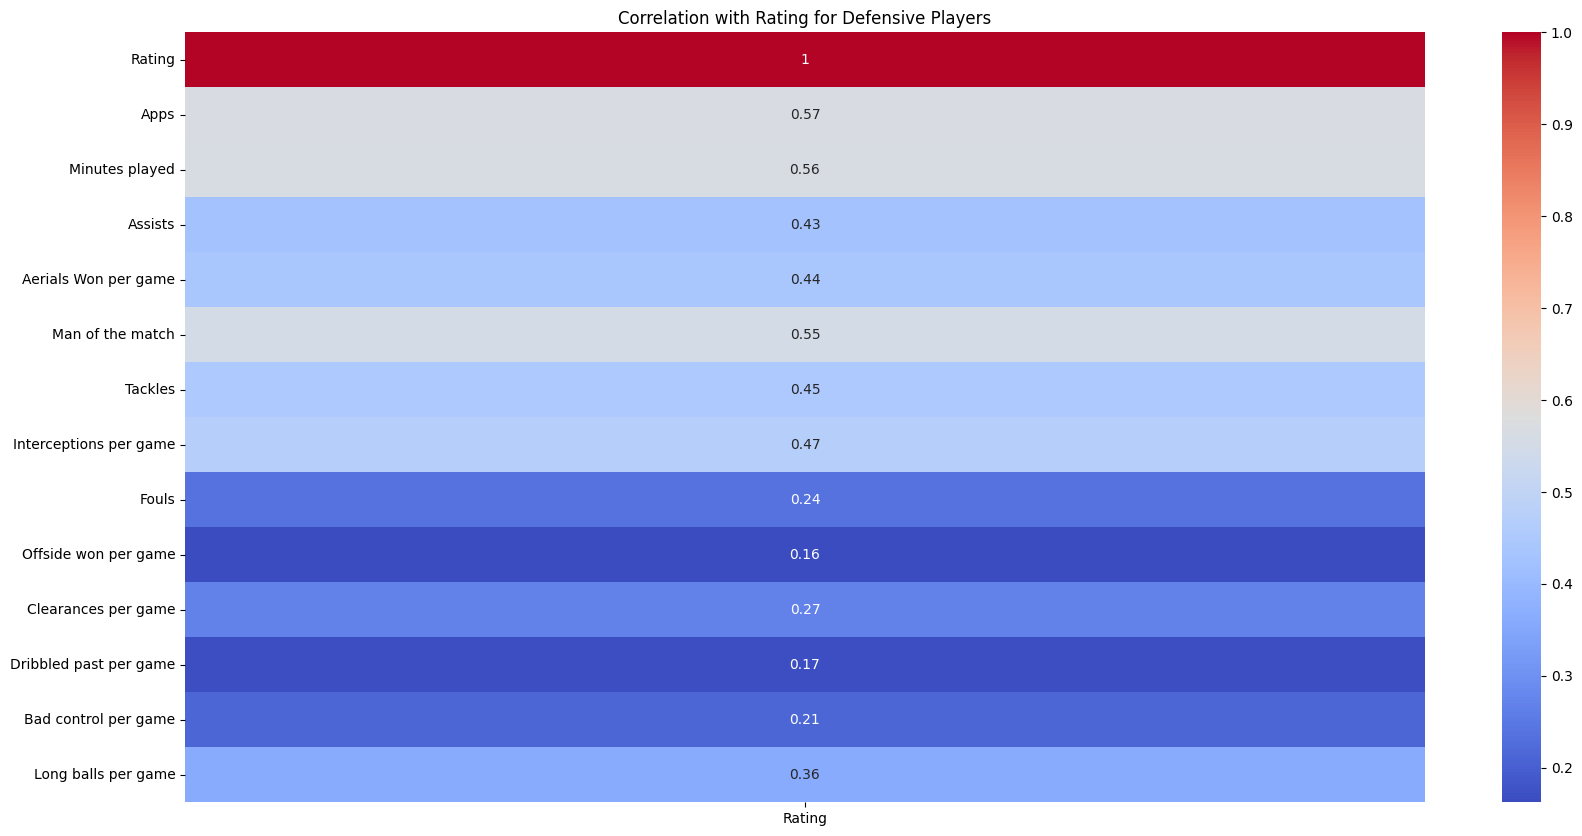

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix_def = df_def.corr()
corr_matrix_def_with_rating = corr_matrix_def[['Rating']]

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_def_with_rating, cmap="coolwarm", annot=True)

plt.title('Correlation with Rating for Defensive Players')
plt.show()


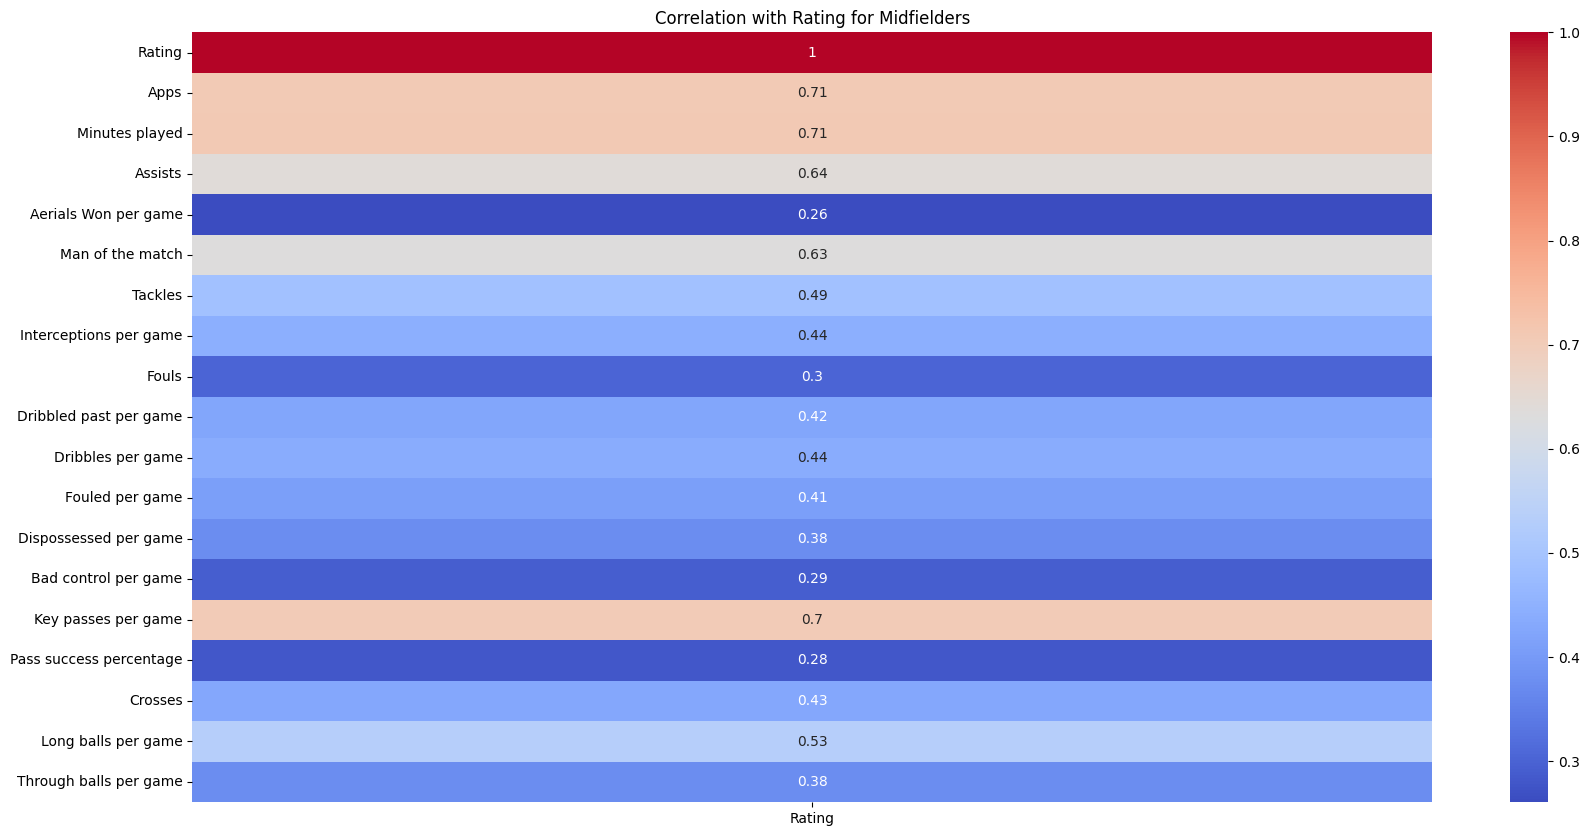

In [87]:
corr_matrix_mid = df_mid.corr()
corr_matrix_mid_with_rating = corr_matrix_mid[['Rating']]

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_mid_with_rating, cmap="coolwarm", annot=True)

plt.title('Correlation with Rating for Midfielders')
plt.show()

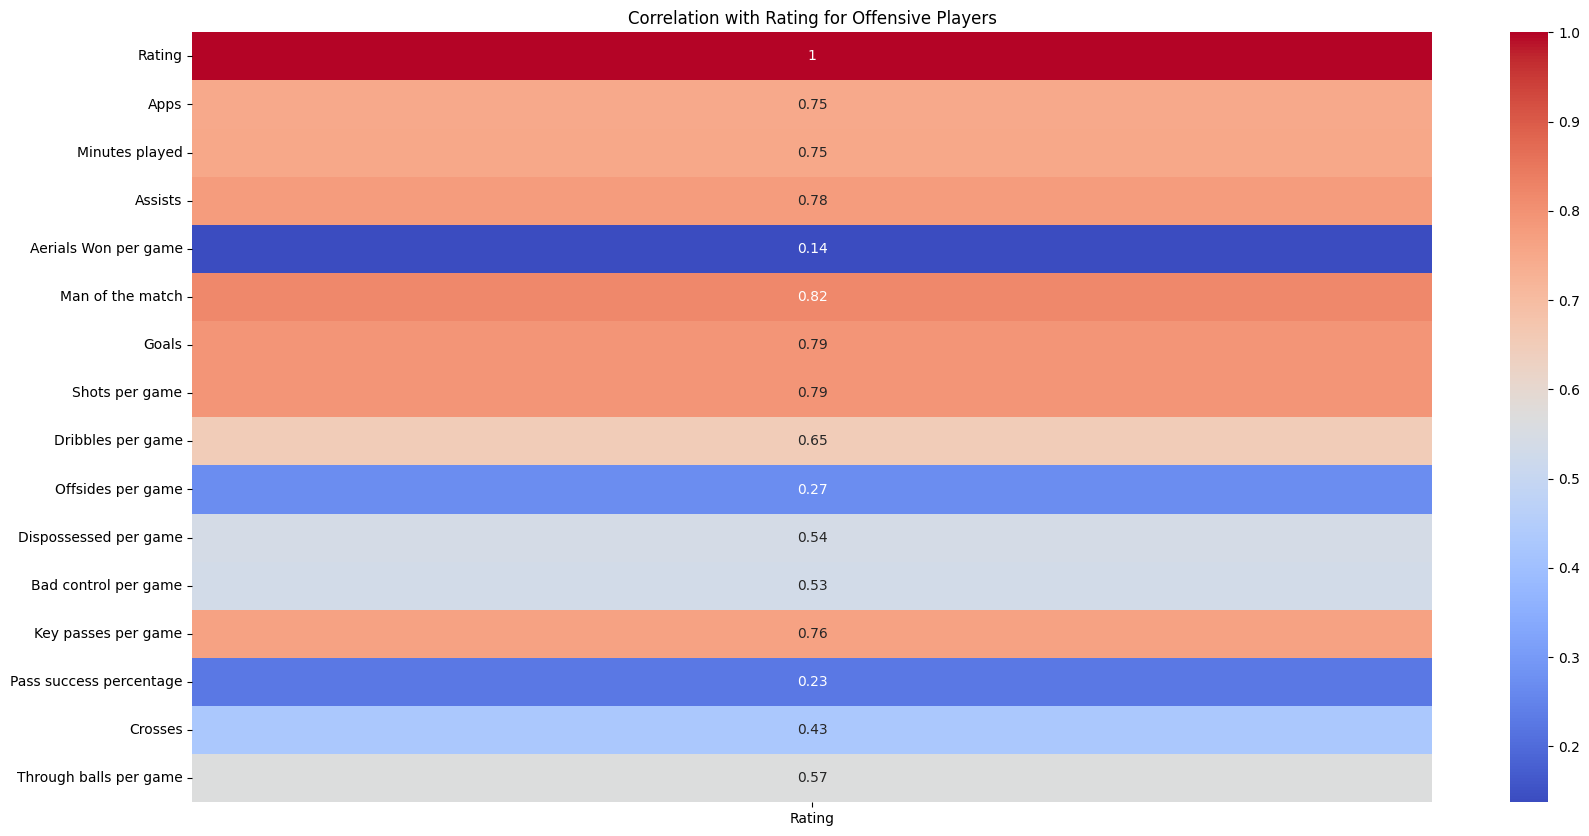

In [89]:
corr_matrix_off = df_off.corr()
corr_matrix_off_with_rating = corr_matrix_off[['Rating']]

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_off_with_rating, cmap="coolwarm", annot=True)

plt.title('Correlation with Rating for Offensive Players')
plt.show()

In [51]:
df_def

,Rating,Apps,Minutes played,Assists,Aerials Won per game,Man of the match,Tackles,Interceptions per game,Fouls,Offside won per game,Clearances per game,Dribbled past per game,Bad control per game,Long balls per game
Name,,,,,,,,,,,,,,
Sergio Ramos,6.91,28,2476,1,2.2,2,1.5,1.3,1.0,1.0,3.0,0.6,0.4,7.1
Diego Godín,6.98,28,2508,1,3.0,1,1.7,1.5,1.1,0.2,4.5,0.7,0.4,3.1
Sergio Busquets,7.00,30,2720,1,1.5,0,2.6,1.5,1.1,0.0,0.6,1.4,0.4,4.3
NGolo Kanté,6.93,36,3096,4,0.8,1,2.1,1.2,1.0,0.0,0.7,1.2,1.6,1.0
Giorgio Chiellini,6.98,22,1990,1,2.1,0,1.0,1.2,0.6,0.2,3.7,0.1,0.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yoel Armougom,6.36,20,1850,1,0.9,0,1.1,0.7,0.7,0.1,2.0,0.5,1.0,1.4
Ben Wilmot,6.07,2,198,0,0.2,0,0.0,0.4,0.4,0.2,2.2,0.4,0.8,1.2
Keven Schlotterbeck,6.58,8,772,0,1.4,0,2.4,1.4,0.6,0.4,2.8,0.4,0.4,3.1


In [52]:
def_att

['Name',
 'Rating',
 'Apps',
 'Minutes played',
 'Assists',
 'Aerials Won per game',
 'Man of the match',
 'Tackles',
 'Interceptions per game',
 'Offside won per game',
 'Clearances per game',
 'Long balls per game',
 'Fouls',
 'Dribbled past per game',
 'Bad control per game']

In [53]:
mid_att

['Name',
 'Rating',
 'Apps',
 'Minutes played',
 'Assists',
 'Aerials Won per game',
 'Man of the match',
 'Tackles',
 'Interceptions per game',
 'Dribbles per game',
 'Fouled per game',
 'Key passes per game',
 'Pass success percentage',
 'Crosses',
 'Long balls per game',
 'Through balls per game',
 'Fouls',
 'Dribbled past per game',
 'Dispossessed per game',
 'Bad control per game']

In [54]:
off_att

['Name',
 'Rating',
 'Apps',
 'Minutes played',
 'Assists',
 'Aerials Won per game',
 'Man of the match',
 'Goals',
 'Shots per game',
 'Dribbles per game',
 'Key passes per game',
 'Pass success percentage',
 'Crosses',
 'Through balls per game',
 'Offsides per game',
 'Dispossessed per game',
 'Bad control per game']

(2) Modelling with Dependent variable = 'Fifa Ability Overall'

### Data Cleaning

In [55]:
df_def1 = df[df['pos'] == 'DEF'].copy()
df_mid1 = df[df['pos'] == 'MID'].copy()
df_off1 = df[df['pos'] == 'OFF'].copy()

def_att1 = ['Name', 'Fifa Ability Overall'] + def_att_pos + def_att_neg
mid_att1 = ['Name', 'Fifa Ability Overall'] + mid_att_pos + mid_att_neg
off_att1 = ['Name', 'Fifa Ability Overall'] + off_att_pos + off_att_neg

df_def1 = drop_col(df_def1, def_att1)
df_mid1 = drop_col(df_mid1, mid_att1)
df_off1 = drop_col(df_off1, off_att1)

df_def1 = df_def1.set_index('Name')
df_mid1 = df_mid1.set_index('Name')
df_off1 = df_off1.set_index('Name')

df_def1['Fifa Ability Overall'] = pd.to_numeric(df_def1['Fifa Ability Overall'], errors='coerce')
df_mid1['Fifa Ability Overall'] = pd.to_numeric(df_mid1['Fifa Ability Overall'], errors='coerce')
df_off1['Fifa Ability Overall'] = pd.to_numeric(df_off1['Fifa Ability Overall'], errors='coerce')

### Split into train set and test set

In [56]:
Y_def1 = df_def1['Fifa Ability Overall']
X_def1 = df_def1.drop('Fifa Ability Overall', axis=1)

Y_mid1 = df_mid1['Fifa Ability Overall']
X_mid1 = df_mid1.drop('Fifa Ability Overall', axis=1)

Y_off1 = df_off1['Fifa Ability Overall']
X_off1 = df_off1.drop('Fifa Ability Overall', axis=1)


X_def1_train, X_def1_test, Y_def1_train, Y_def1_test = train_test_split(X_def1, Y_def1, test_size=0.2, random_state=42)


X_mid1_train, X_mid1_test, Y_mid1_train, Y_mid1_test = train_test_split(X_mid1, Y_mid1, test_size=0.2, random_state=42)

X_off1_train, X_off1_test, Y_off1_train, Y_off1_test = train_test_split(X_off1, Y_off1, test_size=0.2, random_state=42)

### Linear Regression

In [57]:
lr_def1 = LinearRegression()

lr_def1.fit(X_def1_train, Y_def1_train)

Y_def1_pred_lr = lr_def1.predict(X_def1_test)


lr_mid1 = LinearRegression()

lr_mid1.fit(X_mid1_train, Y_mid1_train)

Y_mid1_pred_lr = lr_mid1.predict(X_mid1_test)


lr_off1 = LinearRegression()

lr_off1.fit(X_off1_train, Y_off1_train)

Y_off1_pred_lr = lr_off1.predict(X_off1_test)

### Evaluation

In [58]:
evaluation(Y_def1_test, Y_def1_pred_lr)
evaluation(Y_mid1_test, Y_mid1_pred_lr)
evaluation(Y_off1_test, Y_off1_pred_lr)

Mean Absolute Error:  0.8585911045899797
Mean Squared Error:  1.1648924320157668
R-squared:  -0.16489243201576653
Mean Absolute Error:  0.7030539686196334
Mean Squared Error:  0.7318915991760298
R-squared:  0.26810840082397047
Mean Absolute Error:  0.584983842424433
Mean Squared Error:  0.5917646567090186
R-squared:  0.4082353432909813


{'MAE': 0.584983842424433, 'MSE': 0.5917646567090186, 'R2': 0.4082353432909813}

### Visualize the Correlation between FIFA Ability Score and the independent variables

## Correlation with FIFA Ability Score - Defensive Players

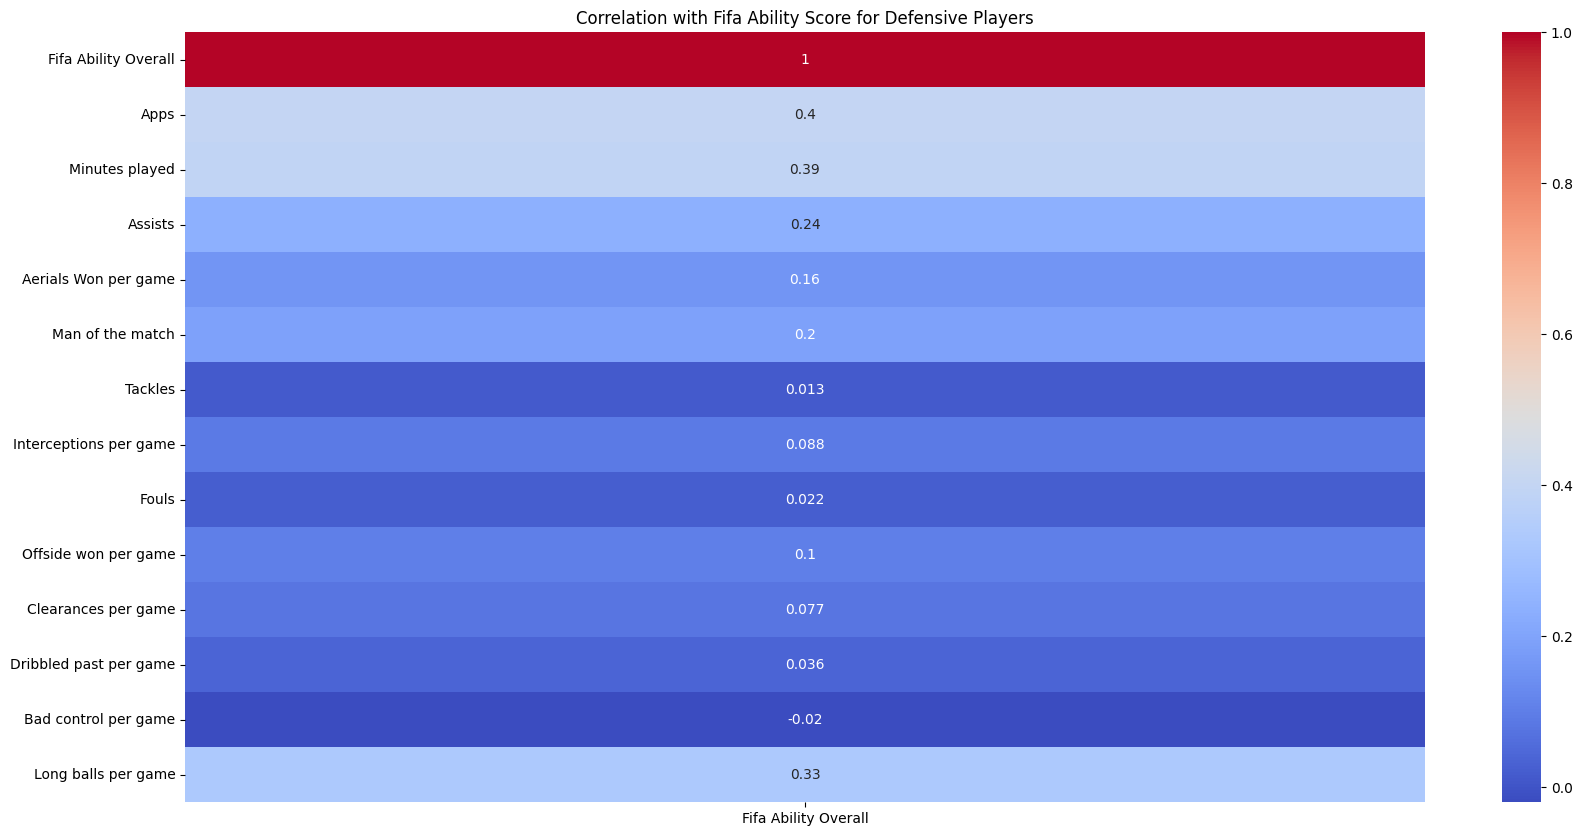

In [84]:
corr_matrix_def1 = df_def1.corr()
corr_matrix_def1_with_ffscore = corr_matrix_def1[['Fifa Ability Overall']]

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_def1_with_ffscore, cmap="coolwarm", annot=True)

plt.title('Correlation with Fifa Ability Score for Defensive Players')
plt.show()

## Correlation with FIFA Ability Score - Midfielders

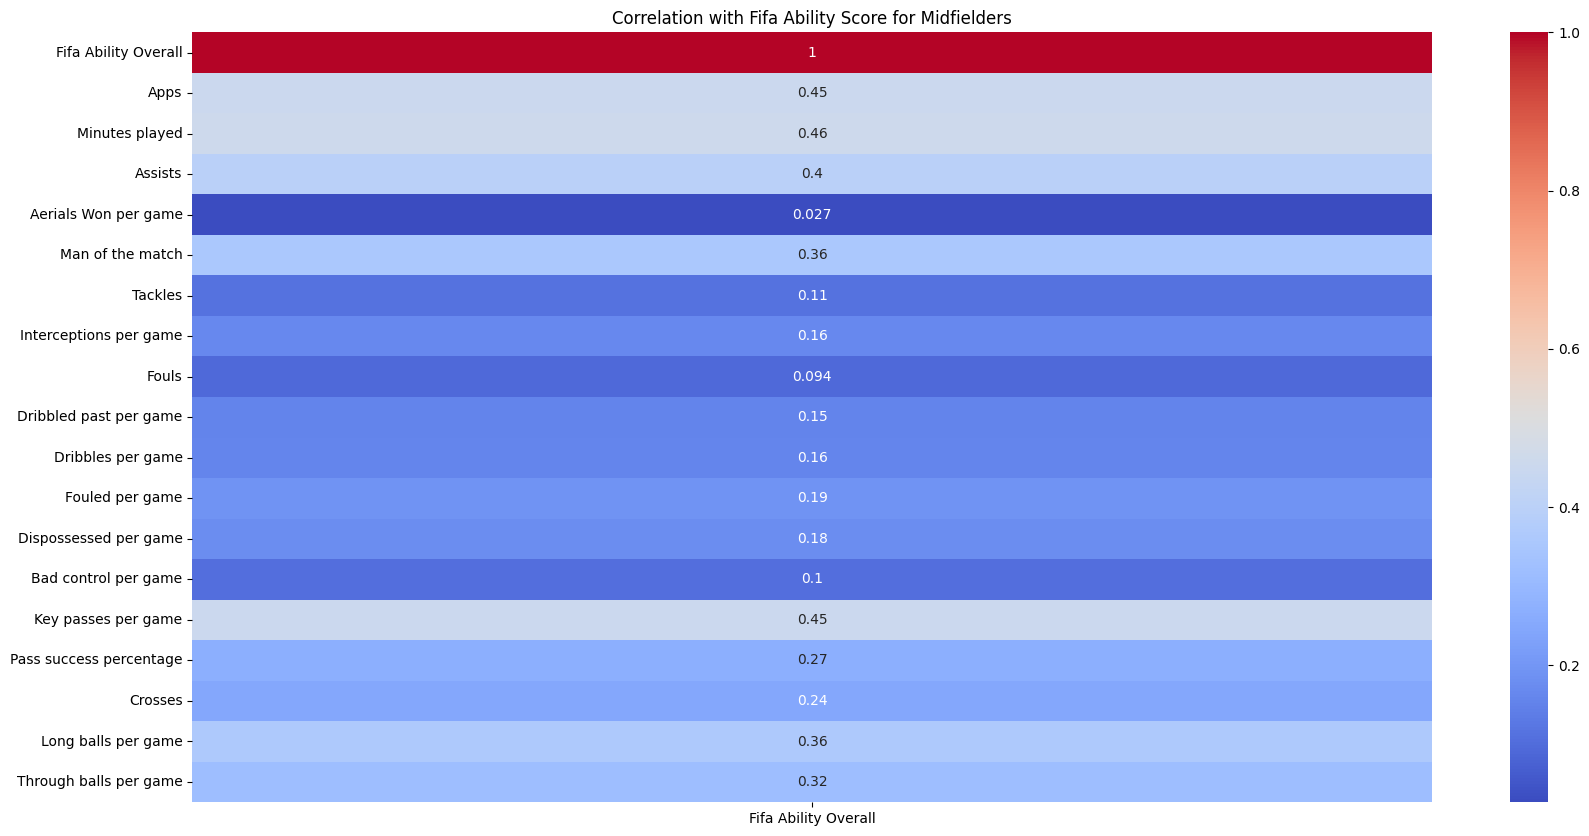

In [85]:
corr_matrix_mid1 = df_mid1.corr()
corr_matrix_mid1_with_rating = corr_matrix_mid1[['Fifa Ability Overall']]

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_mid1_with_rating, cmap="coolwarm", annot=True)

plt.title('Correlation with Fifa Ability Score for Midfielders')
plt.show()

## Correlation with FIFA Ability Score - Offensive Players

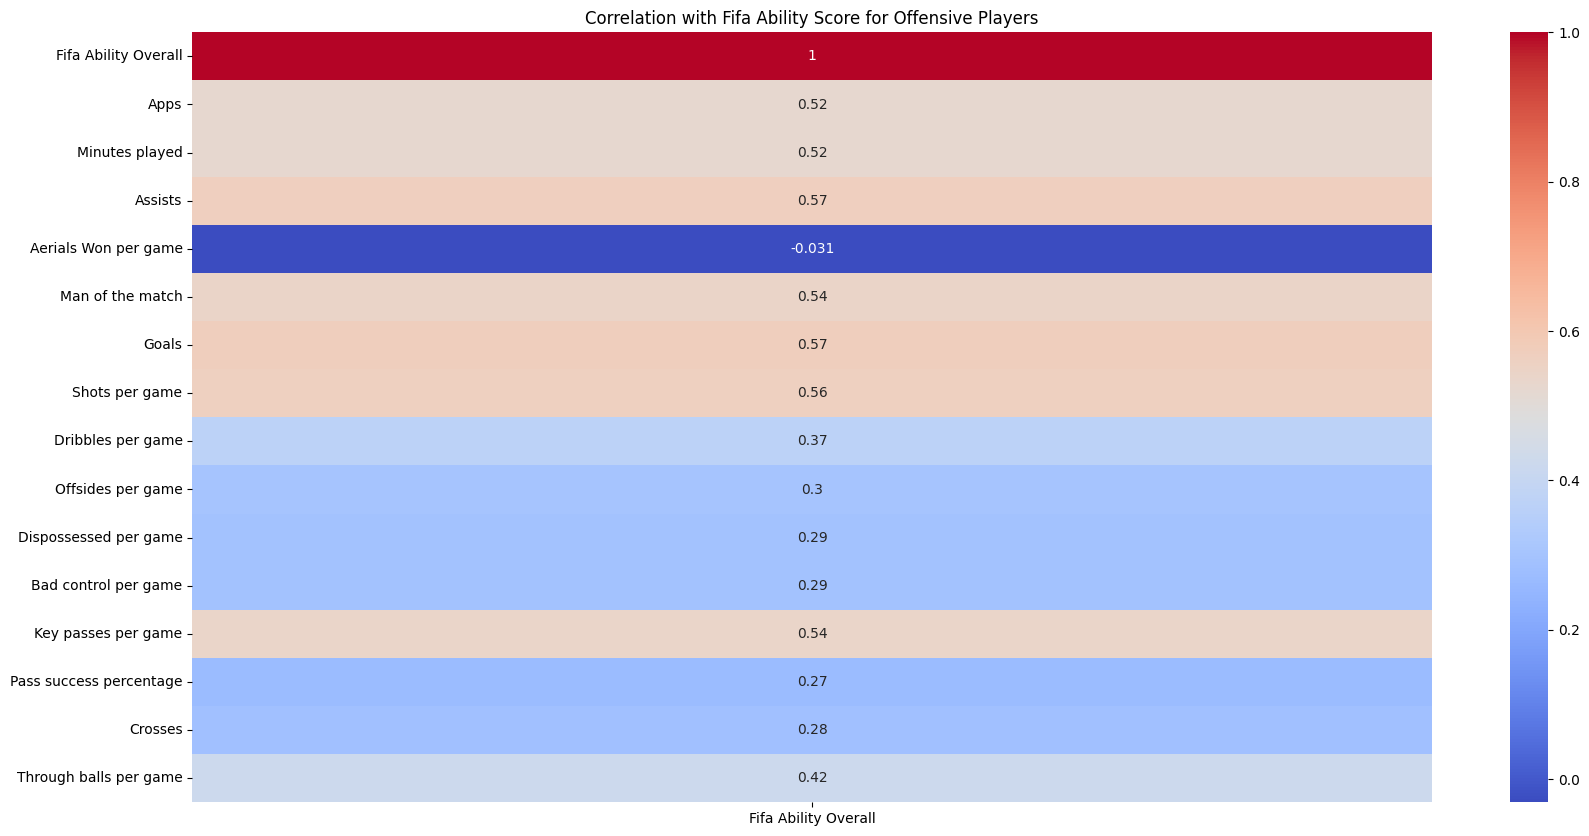

In [86]:
corr_matrix_off1 = df_off1.corr()
corr_matrix_off1_with_ffscore = corr_matrix_off1[['Fifa Ability Overall']]

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_off1_with_ffscore, cmap="coolwarm", annot=True)

plt.title('Correlation with Fifa Ability Score for Offensive Players')
plt.show()

# Comparison: Rating vs FIFA Ability Score as Dependent Variable

(1) Linear Regression

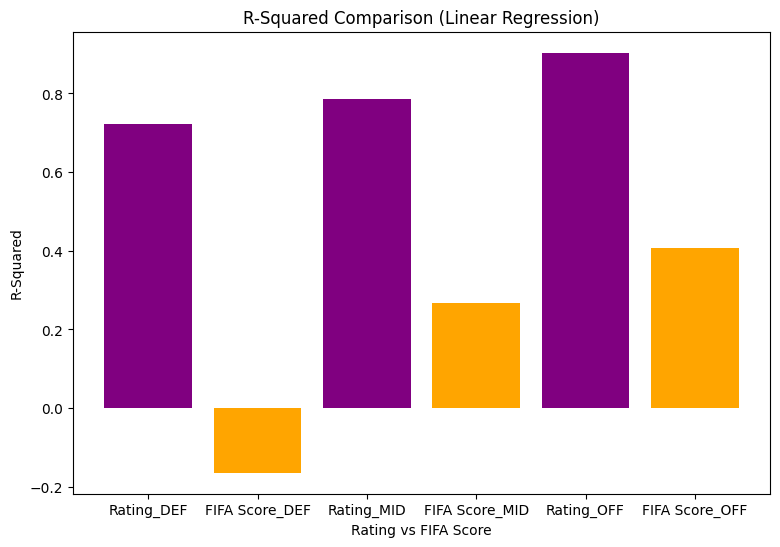

In [92]:
import numpy as np

models = ['Rating_DEF', 'FIFA Score_DEF', 'Rating_MID', 'FIFA Score_MID', 'Rating_OFF', 'FIFA Score_OFF']
r2_values = [0.723, -0.164, 0.786, 0.268, 0.904, 0.408]

colors = ['purple', 'orange']
color_indices = np.arange(len(models)) % len(colors)

plt.figure(figsize=(9,6))
plt.bar(models, r2_values, color=[colors[i] for i in color_indices])

plt.xlabel('Rating vs FIFA Score')
plt.ylabel('R-Squared')
plt.title('R-Squared Comparison (Linear Regression)')

plt.show()

### Support Vector Regression

(1) Modelling with Dependent variable = 'Rating'

In [80]:
from sklearn import svm

X_def_train, X_def_test, Y_def_train, Y_def_test = train_test_split(X_def, Y_def, test_size=0.2, random_state=42)

X_mid_train, X_mid_test, Y_mid_train, Y_mid_test = train_test_split(X_mid, Y_mid, test_size=0.2, random_state=42)

X_off_train, X_off_test, Y_off_train, Y_off_test = train_test_split(X_off, Y_off, test_size=0.2, random_state=42)



svm_def = svm.SVR(kernel='rbf')

svm_def.fit(X_def_train, Y_def_train)

Y_def_pred_svm = svm_def.predict(X_def_test)


svm_mid = svm.SVR(kernel='rbf')

svm_mid.fit(X_mid_train, Y_mid_train)

Y_mid_pred_svm = svm_mid.predict(X_mid_test)


svm_off = svm.SVR(kernel='rbf')

svm_off.fit(X_off_train, Y_off_train)

Y_off_pred_svm = svm_off.predict(X_off_test)


### Evaluation

In [81]:
evaluation(Y_def_test, Y_def_pred_svm)
evaluation(Y_mid_test, Y_mid_pred_svm)
evaluation(Y_off_test, Y_off_pred_svm)

Mean Absolute Error:  0.7140128105501846
Mean Squared Error:  0.7812109047452303
R-squared:  0.21878909525476975
Mean Absolute Error:  0.5925323695160739
Mean Squared Error:  0.6431005534673434
R-squared:  0.3568994465326567
Mean Absolute Error:  0.5180950625445537
Mean Squared Error:  0.5161279158907609
R-squared:  0.4838720841092391


{'MAE': 0.5180950625445537,
 'MSE': 0.5161279158907609,
 'R2': 0.4838720841092391}

### Support Vector Regression

(2) Modelling with Dependent variable = 'Fifa Ability Overall'

In [82]:
X_def1_train, X_def1_test, Y_def1_train, Y_def1_test = train_test_split(X_def1, Y_def1, test_size=0.2, random_state=42)

X_mid1_train, X_mid1_test, Y_mid1_train, Y_mid1_test = train_test_split(X_mid1, Y_mid1, test_size=0.2, random_state=42)

X_off1_train, X_off1_test, Y_off1_train, Y_off1_test = train_test_split(X_off1, Y_off1, test_size=0.2, random_state=42)



svm_def1 = svm.SVR(kernel='rbf')

svm_def1.fit(X_def1_train, Y_def1_train)

Y_def1_pred_svm = svm_def1.predict(X_def1_test)


svm_mid1 = svm.SVR(kernel='rbf')

svm_mid1.fit(X_mid1_train, Y_mid1_train)

Y_mid1_pred_svm = svm_mid1.predict(X_mid1_test)


svm_off1 = svm.SVR(kernel='rbf')

svm_off1.fit(X_off1_train, Y_off1_train)

Y_off1_pred_svm = svm_off1.predict(X_off1_test)

### Evaluation

In [83]:
evaluation(Y_def1_test, Y_def1_pred_svm)
evaluation(Y_mid1_test, Y_mid1_pred_svm)
evaluation(Y_off1_test, Y_off1_pred_svm)

Mean Absolute Error:  0.8877049819693414
Mean Squared Error:  1.1800273355930977
R-squared:  -0.18002733559309747
Mean Absolute Error:  0.7759532911076856
Mean Squared Error:  0.9345407148476876
R-squared:  0.06545928515231259
Mean Absolute Error:  0.7412700163636158
Mean Squared Error:  0.7967134747074713
R-squared:  0.20328652529252855


{'MAE': 0.7412700163636158,
 'MSE': 0.7967134747074713,
 'R2': 0.20328652529252855}

# Comparison: Rating vs FIFA Ability Score as Dependent Variable

(2) Support Vector Regression

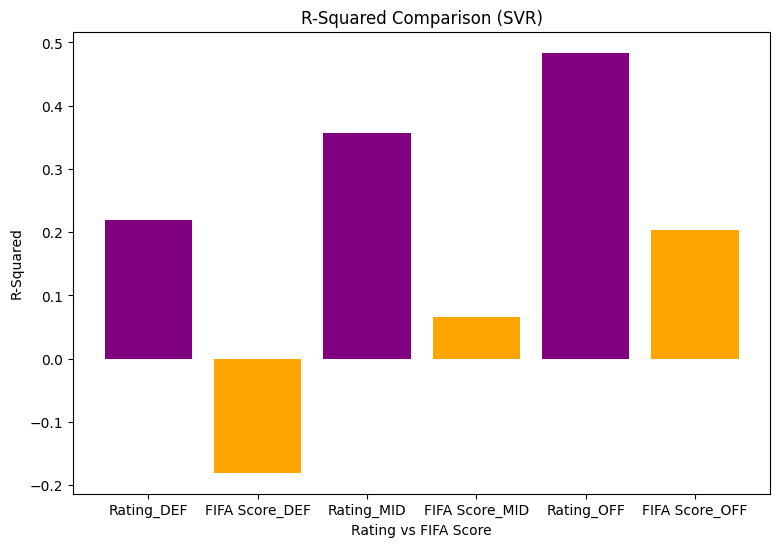

In [97]:
models = ['Rating_DEF', 'FIFA Score_DEF', 'Rating_MID', 'FIFA Score_MID', 'Rating_OFF', 'FIFA Score_OFF']
r2_values = [0.21878909525476975, -0.18002733559309747, 0.3568994465326567, 0.06545928515231259, 0.4838720841092391, 0.20328652529252855]

colors = ['purple', 'orange']
color_indices = np.arange(len(models)) % len(colors)

plt.figure(figsize=(9,6))
plt.bar(models, r2_values, color=[colors[i] for i in color_indices])

plt.xlabel('Rating vs FIFA Score')
plt.ylabel('R-Squared')
plt.title('R-Squared Comparison (SVR)')

plt.show()